In [3]:
from sql_py_defs import *
import matplotlib.pyplot as plt
import numpy as np
import keyring

In [4]:
pw = keyring.get_password("mysql", "ellaguise")
connection = create_db_connection("localhost", "root", pw, "agn_samp")

MySQL Database connection successful


In [5]:
q1 = """
SELECT * FROM agn_samp_z_5_area_10;
"""

results = read_query(connection, q1)
z = [results[i][1] for i in range(len(results))]
lum = [results[i][2] for i in range(len(results))]
mag = [results[i][3] for i in range(len(results))]

In [6]:

c2 = np.sqrt(1e09)
c1 = 0.455*1.25*1e38
M_BH = [(2./3.*(lum[i] + np.log10(c2/c1))) for i in range(len(lum))]

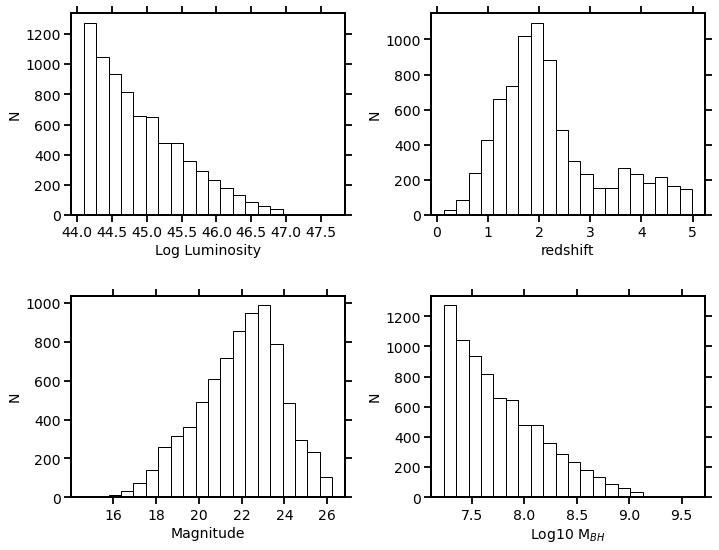

In [8]:
rc('axes', linewidth=2)
fs = 14

fig = plt.figure(figsize=(10,8))

ax1 = fig.add_axes([0.1, 0.62, 0.38, 0.35])
plt.hist(lum, bins=20, color='white', edgecolor='black')
plt.xlabel('Log Luminosity', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('N', fontsize=fs)
plt.tick_params(axis='both', which='major', length=7, width=1.8)
plt.tick_params(axis='both', which='minor', length=4, width=1.8)
plt.tick_params(axis='both', which='both', left=True, right=True, top=True, bottom=True, labelright=False, labeltop=False, labelbottom=True)

ax2 = fig.add_axes([0.6, 0.62, 0.38, 0.35])
plt.hist(z, bins=20, color='white', edgecolor='black')
plt.xlabel('redshift', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('N', fontsize=fs)
plt.tick_params(axis='both', which='major', length=7, width=1.8)
plt.tick_params(axis='both', which='minor', length=4, width=1.8)
plt.tick_params(axis='both', which='both', left=True, right=True, top=True, bottom=True, labelright=False, labeltop=False, labelbottom=True)

ax3 = fig.add_axes([0.1, 0.13, 0.38, 0.35])
plt.hist(mag, bins=20, color='white', edgecolor='black')
plt.xlabel('Magnitude', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('N', fontsize=fs)
plt.tick_params(axis='both', which='major', length=7, width=1.8)
plt.tick_params(axis='both', which='minor', length=4, width=1.8)
plt.tick_params(axis='both', which='both', left=True, right=True, top=True, bottom=True, labelright=False, labeltop=False, labelbottom=True)

ax4 = fig.add_axes([0.6, 0.13, 0.38, 0.35])
plt.hist(M_BH, bins=20, color='white', edgecolor='black')
plt.xlabel(r'Log10 M$_{BH}$', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('N', fontsize=fs)
plt.tick_params(axis='both', which='major', length=7, width=1.8)
plt.tick_params(axis='both', which='minor', length=4, width=1.8)
plt.tick_params(axis='both', which='both', left=True, right=True, top=True, bottom=True, labelright=False, labeltop=False, labelbottom=True)

plt.savefig('mock_agn_samp_distrib.png')